In [334]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Context

In [335]:
titanic_data = pd.read_csv('train.csv', index_col='PassengerId')
print(titanic_data.shape)
titanic_data.head()

(100000, 11)


,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
0,1,1,"Oconnor, Frankie",male,NaN,2,0,209245,27.14,C12239,S
1,0,3,"Bryan, Drew",male,NaN,0,0,27323,13.35,NaN,S
2,0,3,"Owens, Kenneth",male,0.33,1,2,CA 457703,71.29,NaN,S
3,0,3,"Kramer, James",male,19.00,0,0,A. 10866,13.04,NaN,S
4,1,3,"Bond, Michael",male,25.00,0,0,427635,7.76,NaN,S


# Data quality assessment

In [336]:
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100000 entries, 0 to 99999
Data columns (total 11 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   Survived  100000 non-null  int64  
 1   Pclass    100000 non-null  int64  
 2   Name      100000 non-null  object 
 3   Sex       100000 non-null  object 
 4   Age       96708 non-null   float64
 5   SibSp     100000 non-null  int64  
 6   Parch     100000 non-null  int64  
 7   Ticket    95377 non-null   object 
 8   Fare      99866 non-null   float64
 9   Cabin     32134 non-null   object 
 10  Embarked  99750 non-null   object 
dtypes: float64(2), int64(4), object(5)
memory usage: 9.2+ MB


In [337]:
titanic_data.isna().sum()

Survived        0
Pclass          0
Name            0
Sex             0
Age          3292
SibSp           0
Parch           0
Ticket       4623
Fare          134
Cabin       67866
Embarked      250
dtype: int64

Больше всего значений пропущено для Cabin. Прям подчищать все строки с NA не имеет пока смысла, будем аккуратно удалять эти поля только при анализе текстовых колонок

In [338]:
print(titanic_data.shape)
titanic_data.head(10)

(100000, 11)


,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
0,1,1,"Oconnor, Frankie",male,NaN,2,0,209245,27.14,C12239,S
1,0,3,"Bryan, Drew",male,NaN,0,0,27323,13.35,NaN,S
2,0,3,"Owens, Kenneth",male,0.33,1,2,CA 457703,71.29,NaN,S
3,0,3,"Kramer, James",male,19.00,0,0,A. 10866,13.04,NaN,S
4,1,3,"Bond, Michael",male,25.00,0,0,427635,7.76,NaN,S
5,0,2,"Sassano, Jonathan",male,35.00,0,0,13363,6.71,NaN,S
6,0,3,"Conway, Jose",male,7.00,0,0,A/5,9.77,NaN,S
7,1,3,"Werner, Linda",female,6.00,1,2,434426,31.50,NaN,S
8,0,1,"Wardlaw, Michael",male,27.00,2,1,474849,73.02,A7253,S


# Data exploration

## Просто знакомство со значениями в колонках

In [339]:
titanic_data.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,100000.000000,100000.000000,96708.000000,100000.000000,100000.000000,99866.00000
mean,0.427740,2.106910,38.355472,0.397690,0.454560,43.92933
std,0.494753,0.837727,18.313556,0.862566,0.950076,69.58882
min,0.000000,1.000000,0.080000,0.000000,0.000000,0.68000
25%,0.000000,1.000000,25.000000,0.000000,0.000000,10.04000
50%,0.000000,2.000000,39.000000,0.000000,0.000000,24.46000
75%,1.000000,3.000000,53.000000,1.000000,1.000000,33.50000
max,1.000000,3.000000,87.000000,8.000000,9.000000,744.66000


<AxesSubplot:title={'center':'Гистограмма распределения возрастов'}, xlabel='Age', ylabel='Count'>

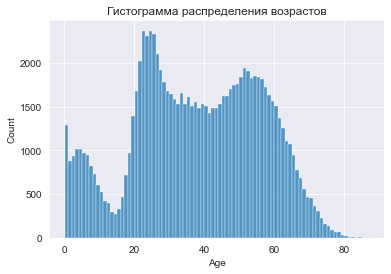

In [340]:
sns.set_style('darkgrid')
plt.title('Гистограмма распределения возрастов')
sns.histplot(titanic_data['Age'], binwidth=1)

In [341]:
print('male and female ratio')
titanic_data['Sex'].value_counts() / titanic_data['Sex'].count()

male and female ratio


male      0.56114
female    0.43886
Name: Sex, dtype: float64

<AxesSubplot:title={'center':'Гистограмма распределения стоимости билета'}, xlabel='Fare', ylabel='Count'>

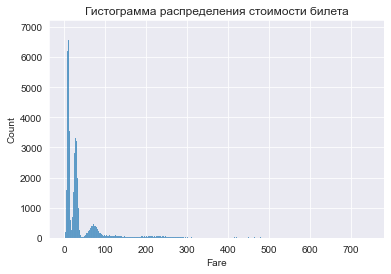

In [342]:
plt.title('Гистограмма распределения стоимости билета')
sns.histplot(titanic_data['Fare'])

<AxesSubplot:title={'center':'Гистограмма распределения класса'}, xlabel='Pclass', ylabel='Count'>

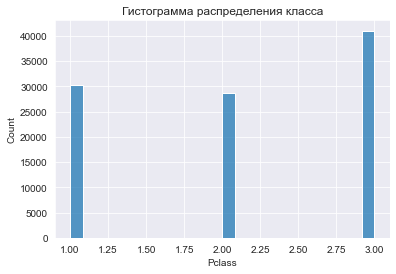

In [343]:
plt.title('Гистограмма распределения класса')
sns.histplot(titanic_data['Pclass'])

In [344]:
titanic_data['Ticket'].value_counts()

A/5             602
C.A.            177
SC/PARIS        145
SOTON/O.Q.       80
SC               57
               ... 
421812            1
PC 420601         1
PC 26800          1
STON/O 23755      1
458074            1
Name: Ticket, Length: 75331, dtype: int64

In [345]:
titanic_data['Embarked'].value_counts() #порты отправления

S    72139
C    22187
Q     5424
Name: Embarked, dtype: int64

Количество человек в каждой кабине:

In [346]:
titanic_data['Cabin'].value_counts()

C19828    6
C6906     5
C13699    5
C14534    5
B11110    5
         ..
A21234    1
A4905     1
C7208     1
A5788     1
D17243    1
Name: Cabin, Length: 26992, dtype: int64

Видимо сектор какой-то/этаж?

## Процент выживших людей

In [347]:
titanic_data.Survived.sum() / titanic_data.shape[0]

0.42774

## Зависимость выживаемости от пола

Sex
0    0.269977
1    0.730023
Name: Survived, dtype: float64

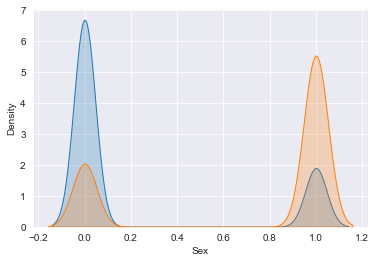

In [348]:
titanic_data_sex = titanic_data.copy()
titanic_data_sex.Sex = titanic_data_sex.Sex.replace({'male':0, 'female':1})
sns.kdeplot(titanic_data_sex[titanic_data_sex.Survived==0].Sex, label='dead', shade=True)
sns.kdeplot(titanic_data_sex[titanic_data_sex.Survived==1].Sex, label='alive', shade=True)

titanic_data_sex.groupby('Sex').Survived.sum() / titanic_data.Survived.sum()

## Зависимость выживаемости от сектора

Cabin
T    0.000716
G    0.020606
F    0.028379
E    0.055223
A    0.088562
D    0.136166
B    0.239710
C    0.430639
Name: Survived, dtype: float64


<AxesSubplot:xlabel='Cabin', ylabel='Density'>

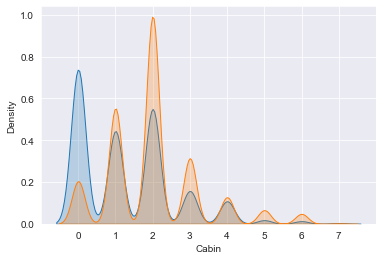

In [349]:
titanic_data_cabin = titanic_data.copy()
titanic_data_cabin = titanic_data_cabin[['Survived', 'Cabin']]
titanic_data_cabin = titanic_data_cabin.dropna()
titanic_data_cabin.Cabin = titanic_data_cabin.Cabin.apply(lambda s: s[0])

titanic_data_cabin_ratio = titanic_data_cabin.groupby('Cabin').Survived.sum() / titanic_data_cabin.Survived.sum()
print(titanic_data_cabin_ratio.sort_values())

titanic_data_cabin.Cabin = titanic_data_cabin.Cabin.replace({'A':0, 'B':1, 'C':2, 'D':3, 'E':4, 'F':5, 'G':6, 'T':7})
sns.kdeplot(titanic_data_cabin[titanic_data_cabin.Survived==0].Cabin, label='dead', shade=True)
sns.kdeplot(titanic_data_cabin[titanic_data_cabin.Survived==1].Cabin, label='alive', shade=True)

## Зависимость выживаемости от билета

In [361]:
titanic_data_ticket = titanic_data.copy()
titanic_data_ticket = titanic_data_ticket[['Survived', 'Ticket', 'Pclass']].dropna()
titanic_data_ticket_ratio = titanic_data_ticket.groupby('Ticket').Survived.sum() / titanic_data_ticket.Survived.sum()
titanic_data_ticket_pclass = titanic_data_ticket.groupby('Ticket').Pclass.value_counts() / titanic_data_ticket.Pclass.count()
print(titanic_data_ticket_ratio.sort_values(ascending=False))
print(titanic_data_ticket_pclass.sort_values(ascending=False))

Ticket
A/5            0.005426
C.A.           0.001710
SC/PARIS       0.001610
SC             0.000694
SOTON/O.Q.     0.000669
                 ...   
424656         0.000000
424685         0.000000
424697         0.000000
424699         0.000000
WE/P 9779      0.000000
Name: Survived, Length: 75331, dtype: float64
Ticket       Pclass
A/5          3         0.005609
C.A.         3         0.001583
SC/PARIS     3         0.001279
SOTON/O.Q.   3         0.000755
A/5          2         0.000702
                         ...   
353157       3         0.000010
353145       2         0.000010
353136       1         0.000010
353118       3         0.000010
WE/P 9779    3         0.000010
Name: Pclass, Length: 85043, dtype: float64


## Зависимость выживаемости от порта посадки

Embarked
C    0.390814
Q    0.075917
S    0.533269
Name: Survived, dtype: float64
Embarked  Pclass
C         1         0.118727
          2         0.061714
          3         0.041985
Q         1         0.037604
          2         0.008461
          3         0.008311
S         3         0.359850
          2         0.216632
          1         0.146717
Name: Pclass, dtype: float64


<AxesSubplot:xlabel='Embarked', ylabel='Density'>

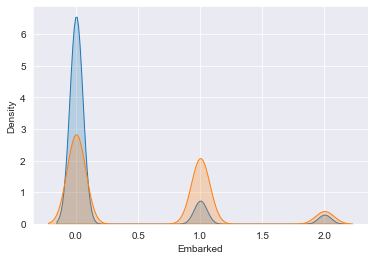

In [350]:
titanic_data_emb = titanic_data.copy()
titanic_data_emb = titanic_data_emb[['Survived', 'Embarked', 'Pclass']].dropna()

print(titanic_data_emb.groupby('Embarked').Survived.sum() / titanic_data_emb.Survived.sum())
print(titanic_data_emb.groupby('Embarked').Pclass.value_counts() / titanic_data_emb.Pclass.count())

titanic_data_emb.Embarked = titanic_data_emb.Embarked.replace({'S':0, 'C':1, 'Q':2})
sns.kdeplot(titanic_data_emb[titanic_data_emb.Survived==0].Embarked, label='dead', shade=True)
sns.kdeplot(titanic_data_emb[titanic_data_emb.Survived==1].Embarked, label='alive', shade=True)

## Зависимость выживаемости от возраста

<AxesSubplot:xlabel='Age', ylabel='Density'>

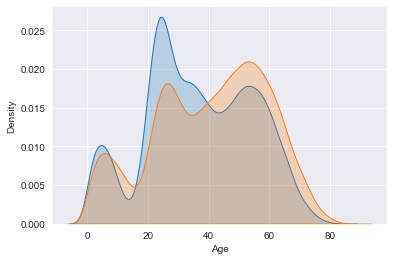

In [351]:
sns.kdeplot(titanic_data[titanic_data.Survived==0].Age, label='dead', shade=True)
sns.kdeplot(titanic_data[titanic_data.Survived==1].Age, label='alive', shade=True)

## Зависимость выживаемости от класса

Pclass
1    0.410904
2    0.352013
3    0.237083
Name: Survived, dtype: float64

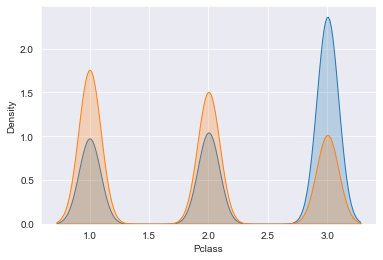

In [352]:
sns.kdeplot(titanic_data[titanic_data.Survived==0].Pclass, label='dead', shade=True)
sns.kdeplot(titanic_data[titanic_data.Survived==1].Pclass, label='alive', shade=True)

titanic_data.groupby('Pclass').Survived.sum() / titanic_data.Survived.sum()

# sns.lineplot(data=titanic_data.groupby('Pclass').Survived.sum() / titanic_data.Survived.sum())

## Зависимость выживаемости от стоимости билета

<AxesSubplot:xlabel='Fare', ylabel='Density'>

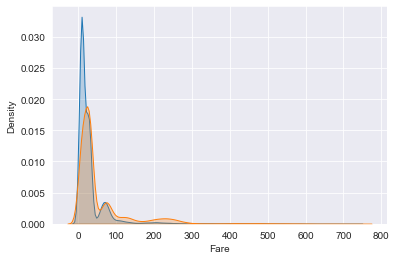

In [353]:
sns.kdeplot(titanic_data[titanic_data.Survived==0].Fare, label='dead', shade=True)
sns.kdeplot(titanic_data[titanic_data.Survived==1].Fare, label='alive', shade=True)

## Зависимость выживаемости от количества супруг/братьев/сестёр

SibSp
0    0.731543
1    0.200355
2    0.039300
3    0.015290
4    0.010263
5    0.000584
8    0.002665
Name: Survived, dtype: float64

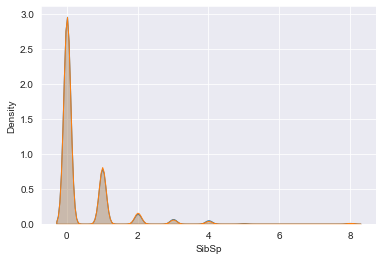

In [354]:
sns.kdeplot(titanic_data[titanic_data.Survived==0].SibSp, label='dead', shade=True)
sns.kdeplot(titanic_data[titanic_data.Survived==1].SibSp, label='alive', shade=True)

titanic_data.groupby('SibSp').Survived.sum() / titanic_data.Survived.sum()

## Зависимость выживаемости от количества родителей/детей

Parch
0    0.696662
1    0.179876
2    0.101066
3    0.011315
4    0.002969
5    0.004419
6    0.000982
9    0.002712
Name: Survived, dtype: float64

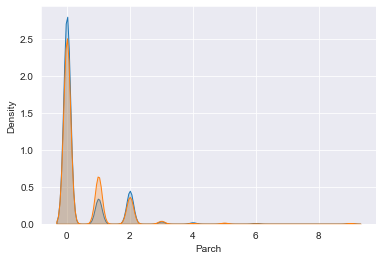

In [355]:
sns.kdeplot(titanic_data[titanic_data.Survived==0].Parch, label='dead', shade=True)
sns.kdeplot(titanic_data[titanic_data.Survived==1].Parch, label='alive', shade=True)

titanic_data.groupby('Parch').Survived.sum() / titanic_data.Survived.sum()

# Summary

1) Средний возраст пассажиров - 38 лет. Распределение немного странное - видно, что у него 3 доминанты - 5, 25, 50 лет.
2) Видно, что распределение стоимости билетов смещено влево - т.е. больше всего людей купили дешёвые билеты. 
3) Всего выжило 42% людей
4) Женщин и мужчин примерно поровну (женщин 43%, мужчин 56%)
5) Видно, что выживаемость зависит от переменной Pclass. По какой-то причине самая низкая выживаемость в Pclass=3 (4%). Самая высокая выживаемость для Pclass=1 составила 83%. Судя по описанию к датасету 3й класс соответствует самому низкому социальному и экономическому статусу. Следовательно, богатых спасали гораздо чаще, чем бедных.
6) Видим, что от возраста выживаемость зависит, но слабо. Стариков выжило больше, чем умерло. Молодых умерло больше, чем выжило. У детей ярко выраженной зависимости нет.
7) Есть общая тенденция - шанс выжить больше, если кол-во людей, которые едут с человеком равно 0 (SibSp=0, Parch=0). Выживших для SibSp = 0 - 71%. Выживших для Parch = 0 - 73%.
8) Женщины выживали чаще, чем мужчины (73% всех женщин выжило, в то время как процент выживших мужчин - 26%)
9) По кабинам - наихудшая выживаемость в кабинах с префиксом T - почти 0%. Есть подозрение, что от T просто дальше всего бежать к спасательным лодкам. Лучшая выживаемость у кабины C - 43% от общего числа выживших.
10) По каким-то загадочным причинам люди, выплышие из C (Cherbourg) выживали чаще (53% выживших). На втором месте S (Southampton) - 39%. На третьем Q (Queenstown) - 7%. Не понятно откуда взялась такая ярко-выраженная зависимость. Может просто Cherbourg - порт какого-то богатого города. Нужно посмотреть связь Embarked и Pclass. Видим, что в S село 35% пассажиров 1го класса, а в C 11% пассажиров 1го класса. В Q всего 3% пассажиров 1го класса. В общем похоже C и S действительно побогаче банально.
11) По какой-то совершенно неясной причине есть зависимость выживаемости от типа билета. Вот в порядке убывания выживаемости топ билетов: A/5, C.A., SC/PARIS, SC, SOTON/O.Q. Нужно посмотреть связь Ticket и Pclass. В основном первые 4 лучших по выживаемости билетов - 3 класс. Связь пока не понятна.